In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1.DataSet

In [38]:
x, y = make_regression(n_samples = 100, n_features = 3, noise = 10)

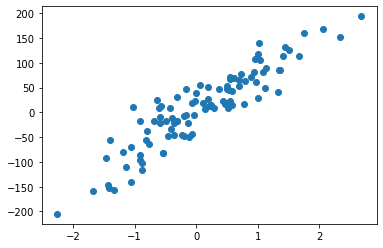

In [40]:
plt.scatter(x[:,0], y)

In [41]:
print(x.shape)
'''
on doit redimensionner le vecteur y car quand on utilise la 
fonction make_regression les dimensions de y ne sont pas 
complètes.
'''
y = y.reshape(100,1)
print(y.shape)

(100, 3)
(100, 1)


In [42]:
#la matrice X qui contient la colonne de biais ( la colonne 1,1,1...)
X = np.hstack((x, np.ones((x.shape[0], 1))))
# cette fonction permet de coller deux matrices numpy de mm nombre de lignes
X.shape


(100, 4)

In [43]:
X

array([[ 0.50037621, -1.3311754 ,  0.25702401,  1.        ],
       [ 0.55534071,  1.33184367,  0.76633508,  1.        ],
       [-0.06790162,  1.07397859,  0.44473827,  1.        ],
       [ 0.96309685,  1.72064346,  0.21179649,  1.        ],
       [ 0.94454092, -0.08210265,  0.11745626,  1.        ],
       [ 0.23374637, -0.9519043 ,  0.94111748,  1.        ],
       [-0.59639828,  0.79542348,  0.30214152,  1.        ],
       [-1.06726795, -1.02241259, -1.70991527,  1.        ],
       [ 0.46191232, -0.2042449 , -0.18135024,  1.        ],
       [-0.92063917, -0.43810752, -1.36212954,  1.        ],
       [-0.36410662,  0.07834195,  0.19751   ,  1.        ],
       [ 0.58513035, -2.63429944,  1.21798391,  1.        ],
       [ 2.33494594, -1.77614769,  1.36303536,  1.        ],
       [-0.64202649,  2.16094294,  0.85183274,  1.        ],
       [ 0.24474493, -0.06247877, -0.18448823,  1.        ],
       [-0.91541764, -1.53389604,  0.83006331,  1.        ],
       [ 1.14102615, -0.

In [49]:
#le vecteur theta
theta = np.random.randn(4,1)
theta

array([[0.37913427],
       [0.89134861],
       [0.90214145],
       [1.52055011]])

# 2.Modèle

In [50]:
def model(X, theta):
    return X.dot(theta )

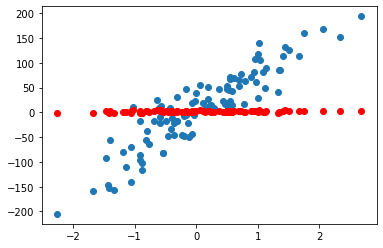

In [51]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], model(X, theta), c = 'r')

In [52]:
theta

array([[0.37913427],
       [0.89134861],
       [0.90214145],
       [1.52055011]])

# 3.Fonction cout

In [53]:
# l'erreur quadratique moyenne
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)

In [54]:
cost_function(X, y, theta)

2964.8644951316064

# 4.Descente de gradient

In [55]:
def grad(X, y, theta):
    m = len(y)
    return 1/(2*m) * X.T.dot(model(X, theta) - y)

In [56]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history
        

# 5.Entrainement du modèle

In [57]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.02, n_iterations = 1000 )
theta_final

array([[74.71434556],
       [21.84831799],
       [18.63631328],
       [ 0.45373358]])

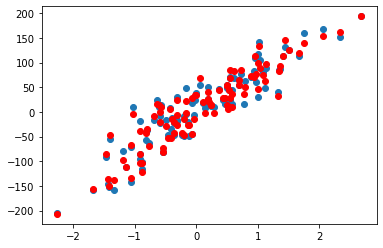

In [58]:
prediction = model(X, theta_final)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], prediction, c='r')

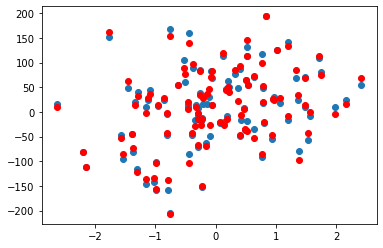

In [59]:
plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], prediction, c='r')

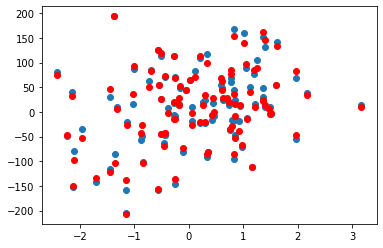

In [60]:
plt.scatter(x[:, 2], y)
plt.scatter(x[:, 2], prediction, c='r')

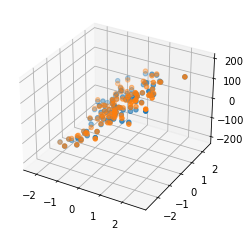

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], prediction)

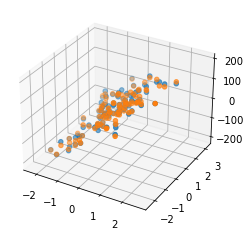

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,2], y)
ax.scatter(x[:,0], x[:,2], prediction)

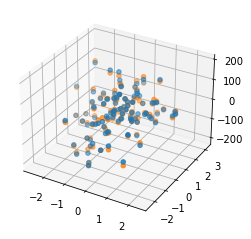

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,1], x[:,2], y)
ax.scatter(x[:,1], x[:,2], prediction)

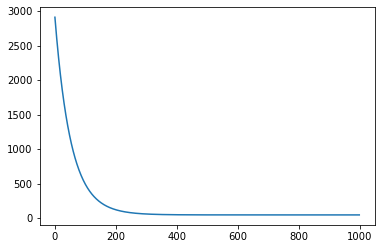

In [67]:
plt.plot(range(1000), cost_history)

# Coefficient de détermination

In [68]:
def coef_determination(y, pred):
    u = ((y- pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [69]:
coef_determination(y, prediction)

0.9840486423218339